1, Function to rearrange digits

In [1]:
def myfunc(inp = 111111):
    inp = input('Enter please a numner: ')
    inp_digits = []
    
    for i in inp:
        inp_digits.append(i)
    inp_digits.sort(reverse = True)
    
    out = ''
    for i in inp_digits:
        out = out + i
        
    return out
    
# now the question is if I do not give an input, why does it not use the default?   

In [9]:
myfunc()

Enter please a numner: 


''

2, Jeopard

In [10]:
import pandas as pd

jeopard = 'C:/Users/balazs.varga/Documents/BALAZS/USE/REPOS/DSC/HOMEWORK/WEEK5/JEOPARDY_CSV.CSV'

df = pd.read_csv(jeopard)
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [11]:
n_of_rows = len(df.index)
print(n_of_rows)
#looks like these are questions appearing in shows

216930


In [12]:
nunique_shows = df['Show Number'].nunique()
print(nunique_shows)


3640


# How many different prices there are?

In [13]:
nunique_price = df.iloc[:, 4].nunique()
print(nunique_price)
# OK this might be boring

146


In [14]:
# lets try to find out how long these things were aired
df.iloc[:,1] = pd.to_datetime(df.iloc[:,1])
beginning = df.iloc[:, 1].min()
end = df.iloc[:, 1].max()

print(beginning)
print(end)


1984-09-10 00:00:00
2012-01-27 00:00:00


3, Let's create some graphs

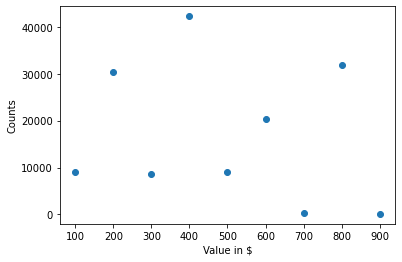

In [127]:
# lets see if there is a correlation between the value of the price and their counts amongst the 10 most frequent prices

import matplotlib.pyplot as plt

dropped = df.drop(columns = [' Category', ' Question', ' Answer', ' Air Date', ' Round'])
dropped[' Value'] = [x[1:-1] for x in dropped[' Value']]
#seems like have to drop the $ sign before trying to convert to numeric

counts = dropped.groupby(dropped[' Value']).count().set_axis(['Counts'], axis = 1)
merged = pd.merge(dropped, counts, on = ' Value').drop_duplicates(subset = ' Value')
merged[' Value'] = pd.to_numeric(merged[' Value'], errors = 'coerce')
merged = merged.dropna()
merged = merged.sort_values(by = 'Counts', ascending = False)
selected = merged.iloc[0:9, :].copy()

selected

plt.scatter(selected[' Value'], selected['Counts'])
plt.xlabel('Value in $')
plt.ylabel('Counts')
plt.show()
